In [90]:
from pathlib import Path
import time
import warnings
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
from scipy.stats import gaussian_kde, norm
from astropy.coordinates import SkyCoord
from astropy.table import vstack, Table
from astroquery.simbad import Simbad
from astroquery.simbad.core import BlankResponseWarning

import scienceplots
plt.style.use('science')

from exod.utils.logger import logger
from exod.post_processing.crossmatch import crossmatch_unique_regions
from exod.post_processing.crossmatch_simulation import get_unique_regions
from exod.utils.plotting import set_latex_font
from exod.post_processing.crossmatch import crossmatch_dr14_slim
warnings.filterwarnings("ignore", category=BlankResponseWarning)
#set_latex_font()

In [91]:
tables = crossmatch_unique_regions()

2024-06-28 13:58:14,546 - INFO - crossmatch_simulation.py:get_unique_regions - A total of 31088 unique sources were found from 60127 sources within a clustering radius of 20.0 arcsec
2024-06-28 13:58:14,550 - INFO - crossmatch.py:crossmatch_dr14_slim - Crossmatching with 4XMM DR14 slim catalogue
2024-06-28 13:58:15,307 - INFO - crossmatch.py:crossmatch_chunk - /home/nkhan/EXOD2/data/results_combined/merged_with_dr14/df_regions_unique_cmatch_simbad.csv exists and clobber=False | loading table...
2024-06-28 13:58:15,473 - INFO - crossmatch.py:crossmatch_chunk - /home/nkhan/EXOD2/data/results_combined/merged_with_dr14/df_regions_unique_cmatch_gaia.csv exists and clobber=False | loading table...
2024-06-28 13:58:15,849 - INFO - crossmatch.py:crossmatch_chunk - /home/nkhan/EXOD2/data/results_combined/merged_with_dr14/df_regions_unique_cmatch_om.csv exists and clobber=False | loading table...


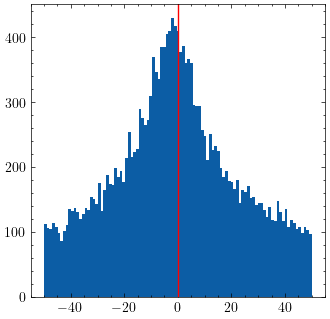

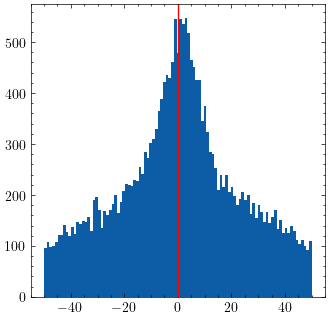

In [299]:
tab_cmatch_xmm = tables['tab_cmatch_xmm']

plt.figure(figsize=(3.8,3.8))
ra  = tab_cmatch_xmm['RA_OFFSET']*3600 
dec = tab_cmatch_xmm['DEC_OFFSET']*3600
plt.hist(ra, bins=np.linspace(-50,50,100))
plt.axvline(0, color='red')
plt.show()

plt.figure(figsize=(3.8,3.8))
ra  = tab_cmatch_xmm['RA_OFFSET']*3600 
dec = tab_cmatch_xmm['DEC_OFFSET']*3600
plt.hist(dec, bins=np.linspace(-50,50,100))
plt.axvline(0, color='red')
plt.show()

In [141]:
u_dict = {'pc'  : u.pc,
          'kpc' : u.kpc,
          'Mpc' : u.Mpc}
mask = (tab_crossmatch['Distance_distance'] == None).mask
mask = ~mask
units = [u_dict[i] for i in tab_crossmatch[mask]['Distance_unit']]
dist = tab_crossmatch[mask]['Distance_distance'] * units
dist_pc = [d.to('pc').value for d in dist]

Text(0.5, 0, 'Distance [$log_{10}$(pc)]')

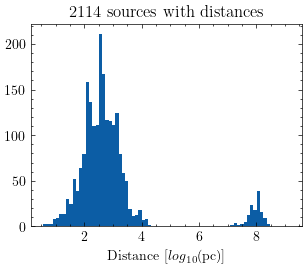

In [144]:
df_crossmatch['Distance_method'].value_counts()

Distance_method
paral       1810
ST-L          89
kin           53
redshift      38
T-F            7
RRLyr          5
|ST-L          3
CaIIHK         3
unknown        1
Cep            1
Name: count, dtype: int64

Text(0.5, 1.0, 'Counterpart Wavelength')

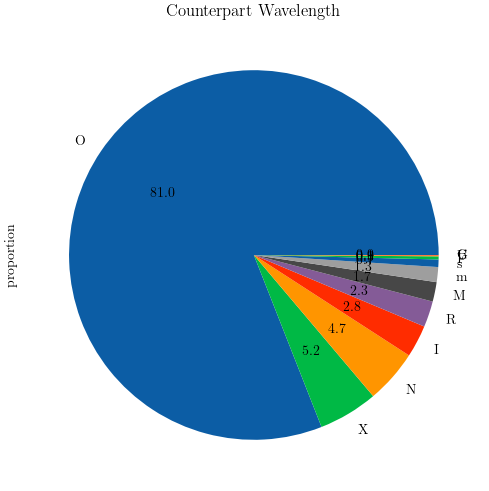

In [121]:
df_crossmatch['COO_WAVELENGTH'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Counterpart Wavelength')

In [122]:
df_crossmatch['Distance_method'].value_counts()

Distance_method
paral       1810
ST-L          89
kin           53
redshift      38
T-F            7
RRLyr          5
|ST-L          3
CaIIHK         3
unknown        1
Cep            1
Name: count, dtype: int64

In [123]:
df_crossmatch['Distance_bibcode'].value_counts()

Distance_bibcode
2020yCat.1350....0G    1677
2018yCat.1345....0G     131
2020AJ....160...83S      68
2016AJ....152...50T      41
2007ApJ...655..790C      28
                       ... 
2011A&A...533A.142B       1
1992MNRAS.256..631R       1
2010MNRAS.403.1949K       1
2010ApJ...725.2270P       1
2015ApJ...815...22K       1
Name: count, Length: 64, dtype: int64

In [124]:
mask = df_crossmatch['SEP_ARCSEC'] == 9999
df_cmatch = df_crossmatch[~mask]
df_no_cmatch = df_crossmatch[mask]

In [125]:
from exod.utils.plotting import plot_aitoff

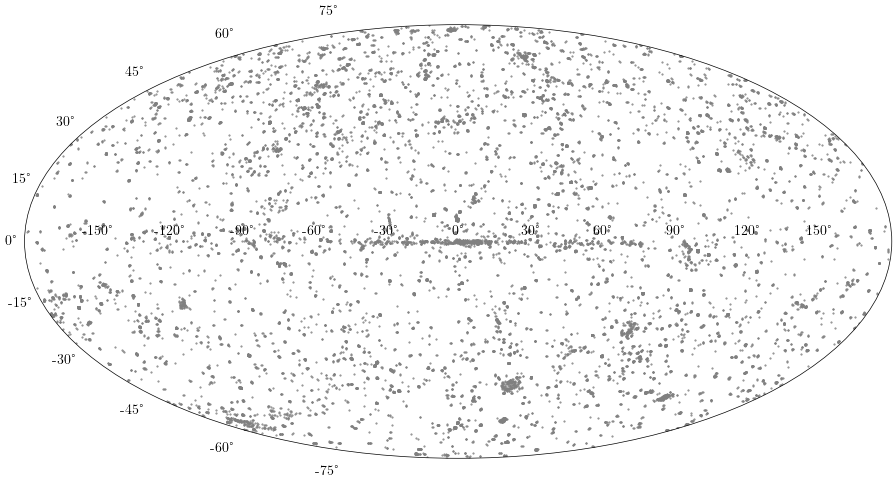

In [126]:
plot_aitoff(df_no_cmatch['RA_REGION_DEG'], df_no_cmatch['DEC_REGION_DEG'])

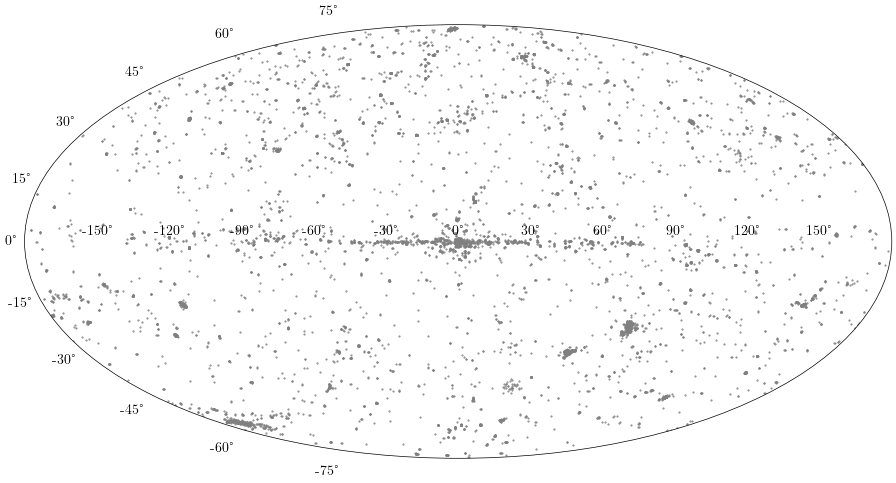

In [127]:
plot_aitoff(df_cmatch['RA_REGION_DEG'], df_cmatch['DEC_REGION_DEG'])

In [128]:
sc = SkyCoord(ra=df_cmatch['RA'], dec=df_cmatch['DEC'], unit=(u.hourangle, u.deg))

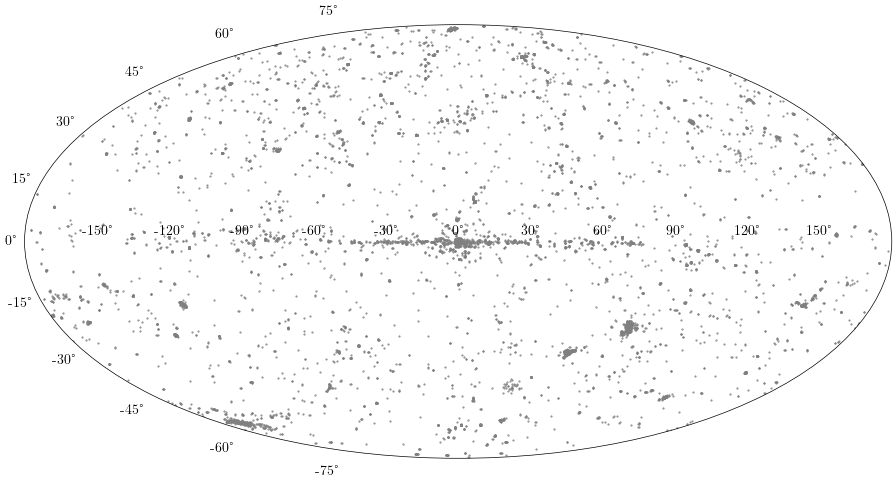

In [129]:
plot_aitoff(sc.ra.deg, sc.dec.deg)

In [130]:
df_otype = pd.read_csv('../data/util/otypes_nodes-1.csv')
df_otype

,Id,Label,Candidate,Description,Category,Subcategory,Comment,Status,Priority
0,?,Unknown,NaN,Object of Unknown Nature,"8. BLENDS, ERRORS, NOT WELL DEFINED OBJECTS",NaN,NaN,NaN,NaN
1,..1,NaN,NaN,{pr*} Pre-Main Sequence Star,1. TAXONOMY OF STARS,Young Stellar Objects (Pre-Main Sequence Stars),= Y*O,old,NaN
2,..10,NaN,NaN,Barium Star,1. TAXONOMY OF STARS,Chemically Peculiar Stars,Check the SpT,old,NaN
3,..11,NaN,NaN,Dwarf Carbon Star,1. TAXONOMY OF STARS,Chemically Peculiar Stars,Maintype = Pe* and SpT like dC,old,NaN
4,..12,NaN,NaN,Carbon-Enhanced Metal Poor Star,1. TAXONOMY OF STARS,Chemically Peculiar Stars,Maintype = Pe* and SpT like CEMP,old,NaN
...,...,...,...,...,...,...,...,...,...
180,WR*,WolfRayet*,WR?,Wolf-Rayet,1. TAXONOMY OF STARS,Massive Stars and their Remnants,SpT like W,NaN,NaN
181,WV*,Type2Cep,WV?,Type II Cepheid Variable,1. TAXONOMY OF STARS,Evolved Stars,Includes W Wir and BL Her subtypes,NaN,NaN
182,X,X,NaN,X-ray Source,7. GENERAL SPECTRAL PROPERTIES,NaN,NaN,NaN,NaN
183,XB*,XrayBin,XB?,X-ray Binary,1. TAXONOMY OF STARS,Interacting Binaries and close Common Proper M...,NaN,NaN,NaN


In [131]:
r = []
for otype in df_cmatch['OTYPE']:
    try:
        c = df_otype[df_otype['Label'] == otype]['Category'].iloc[0]
        r.append(c)
    except IndexError:
        r.append('None')

In [132]:
df_cmatch['OTYPE_sub'] = r

/tmp/ipykernel_88267/1450802294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cmatch['OTYPE_sub'] = r


In [133]:
df_cmatch['OTYPE_sub'].value_counts(normalize=True)

OTYPE_sub
1. TAXONOMY OF STARS                           0.390723
4. TAXONOMY OF GALAXIES                        0.311015
None                                           0.117042
7. GENERAL SPECTRAL PROPERTIES                 0.111694
3. INTERSTELLAR MEDIUM                         0.023552
2. SETS OF STARS                               0.020364
5. SETS OF GALAXIES                            0.012650
8. BLENDS, ERRORS, NOT WELL DEFINED OBJECTS    0.011725
6. GRAVITATION                                 0.001234
Name: proportion, dtype: float64

In [175]:
tab_cmatch_om.columns

<TableColumns names=('_q','XMMOM','IDsum','ObsID','ID','UVW2r','UVM2r','UVM1r','Ur','Br','Vr','RAJ2000','DEJ2000','ePos','Nobs','sig_UVW2_','sig_UVM2_','sig_UVW1_','sig_U_','sig_B_','sig_V_','F_UVW2_','F_UVM2_','F_UVW1_','F_U_','F_B_','F_V_','UVW2mAB','UVM2mAB','UVW1mAB','UmAB','BmAB','VmAB','q.UVW2','q.UVM2','q.UVW1','q.U','q.B','q.V','xUVW2','xUVM2','xUVW1','xU','xB','xV','SEP_ARCSEC','RA_REGION_DEG','DEC_REGION_DEG','SCRIPT_NUMBER_ID')>

In [163]:
tab_cmatch_om = tables['tab_cmatch_om']
tab_cmatch_om = tab_cmatch_om[tab_cmatch_om['SEP_ARCSEC'] < 10]

Text(0.5, 0, 'Distance [$log_{10}$(pc)]')

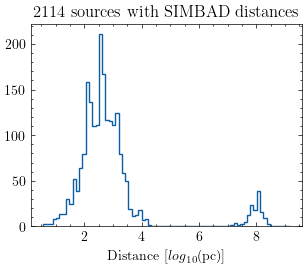

In [237]:
plt.title(f'{len(dist_pc)} sources with SIMBAD distances')
plt.hist(np.log10(dist_pc),bins=75, histtype='step')
plt.xlabel('Distance [$log_{10}$(pc)]')

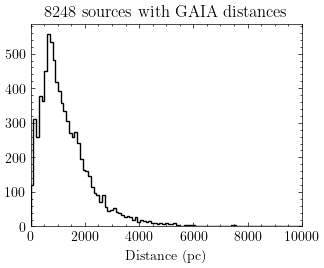

In [232]:
tab_cmatch_gaia = tables['tab_cmatch_gaia']
sub = tab_cmatch_gaia[tab_cmatch_gaia['Dist']>0]

plt.hist(sub['Dist'], bins=np.linspace(0,10000,100), histtype='step', color='black')
plt.xlabel('Distance (pc)')
plt.xlim(0,10000)
plt.title(f'{len(sub)} sources with GAIA distances')
plt.show()

In [275]:
from matplotlib.colors import LogNorm

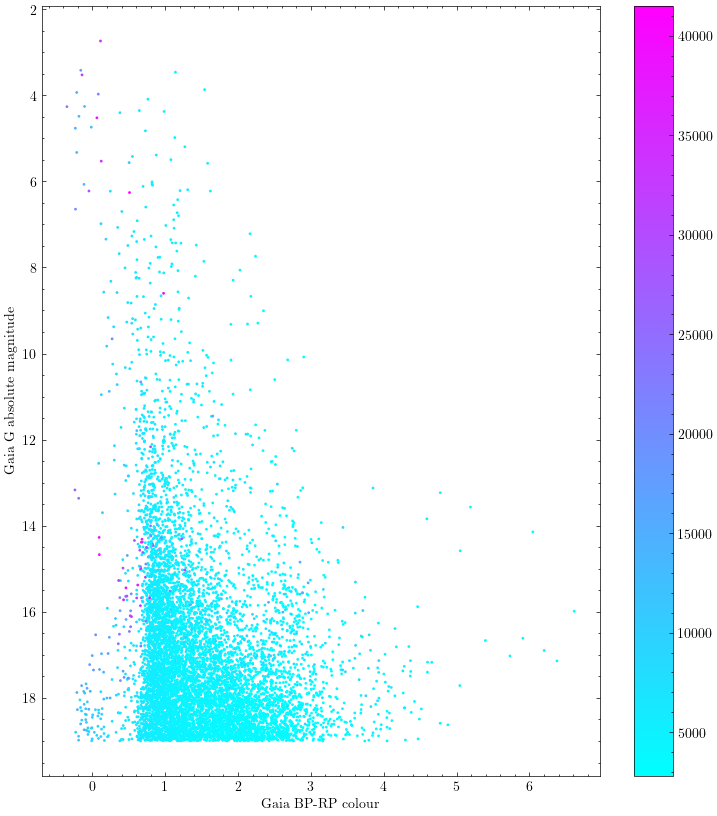

In [288]:
plt.figure(figsize=(9,10))
#plt.scatter(tab_cmatch_gaia['BP-RP'], tab_cmatch_gaia['Gmag'], s=0.5)
plt.scatter(tab_cmatch_gaia['BP-RP'], tab_cmatch_gaia['Gmag'], s=1, c=tab_cmatch_gaia['Teff'], cmap='cool')
plt.xlabel('Gaia BP-RP colour')
plt.ylabel('Gaia G absolute magnitude')
plt.gca().invert_yaxis()

plt.colorbar()


In [274]:
tab_cmatch_gaia

_q,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RUWE,FG,e_FG,Gmag,FBP,e_FBP,BPmag,FRP,e_FRP,RPmag,BP-RP,RV,e_RV,Vbroad,GRVSmag,QSO,Gal,NSS,XPcont,XPsamp,RVS,EpochPh,EpochRV,MCMCGSP,MCMCMSC,And,Teff,logg,__Fe_H_,Dist,A0,HIP,PS1,SDSS13,SKYM2,TYC2,URAT1,AllWISE,APASS9,GSC23,RAVE5,_2MASS,RAVE6,RAJ2000,DEJ2000,SEP_ARCSEC,RA_REGION_DEG,DEC_REGION_DEG,SCRIPT_NUMBER_ID
int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,int64,int64,int64,int64,str11,str15,str19,int64,str10,str16,str16,str21,float64,float64,float64,float64,float64,int64
0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,9999.0,9.801227383750444,-43.8251508880214,0
1,9.73299900686,-43.77916468284,4980548014650442880,0.2387,0.3106,0.1015,0.4436,12.799,12.387,0.245,-3.219,0.372,1.019,211.50809,0.6552,19.87405,66.92,5.172,20.774723,220.1,5.657,18.8911,1.883623,--,--,--,--,0,0,0,0,0,0,0,0,0,0,0,--,--,--,--,--,--,--,--,--,--,--,J003855.87-434644.5,--,S2T1005114,--,--,--,9.73292275487,-43.77915037787,22.058727342515315,9.739231878966937,-43.77500418401057,1
2,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,9999.0,9.700222041435804,-43.51829704313748,2
3,9.47303340975,-43.54774514688,4980753588965170816,2.5635,2.9914,--,--,--,--,--,--,--,--,59.14658,0.9102,21.257544,86.73,8.878,20.493069,223.3,13.17,18.875486,1.617582,--,--,--,--,0,0,0,0,0,0,0,0,0,0,0,--,--,--,--,--,--,--,--,--,--,--,J003753.54-433251.9,--,S2T1008038,--,--,--,9.47303340975,-43.54774514688,17.607246647213792,9.476926528206056,-43.551738868839216,3
4,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,9999.0,9.445899701766376,-43.62983752762533,4
5,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,9999.0,9.384273254413518,-43.61298732431519,5
6,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,9999.0,9.932276342113546,-43.73555884655124,6
7,9.37698819458,-43.76033867771,4980715316512260608,0.042,0.0477,0.9096,0.0719,20.496,17.216,0.047,11.122,0.057,1.026,2562.15835,1.533,17.165852,970.5,7.39,17.871052,2300.0,10.7,16.343828,1.527224,--,--,--,--,0,0,0,1,0,0,0,0,1,1,0,4289.7,4.5042,-0.0203,1118.6498,0.0655,--,--,--,8894065,--,--,J003730.46-434537.2,--,S2T1005410,--,00373045-4345374,--,9.37688225386,-43.76038811002,28.31048064983833,9.37600650287454,-43.75250514229391,7
8,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,9999.0,9.5537844745278,-43.70250149079044,8
